In [1]:
import pandas as pd
d=pd.read_excel('/content/employee_burnout_analysis-AI.xlsx')
df=pd.DataFrame(d)
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


Data Cleaning

In [ ]:
df.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [4]:
df.drop(['Employee ID'],axis=1,inplace=True)

In [5]:
df

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
# prompt: fill or remove duplicates

df.duplicated().sum()


10

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [11]:
df=df.dropna()
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29


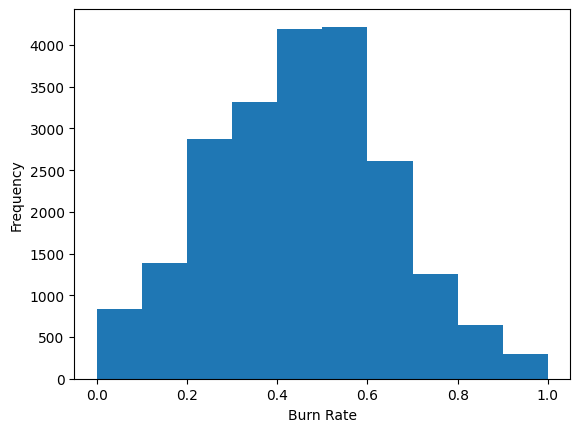

In [3]:
import matplotlib.pyplot as plt
# height=df['Company Type'].value_counts()
# plt.bar(x=height.index,y=height.values)
plt.hist(df['Burn Rate'])
# plt.title('Gender vs Burn Rate')
plt.xlabel('Burn Rate')
plt.ylabel('Frequency')
plt.show()

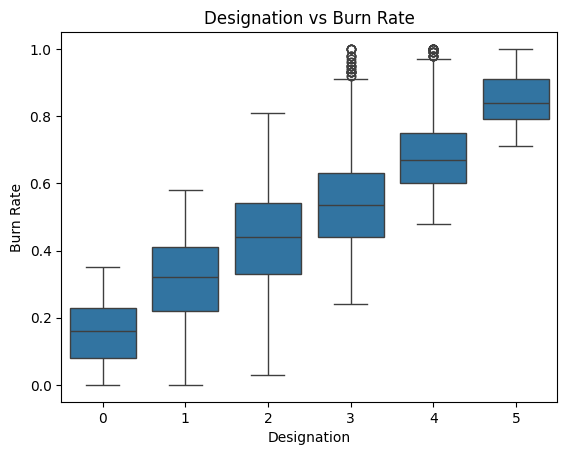

In [15]:
import seaborn as sns
sns.boxplot(x=df['Designation'],y=df['Burn Rate'])
plt.xlabel('Designation')
plt.ylabel('Burn Rate')
plt.title('Designation vs Burn Rate')
plt.show()

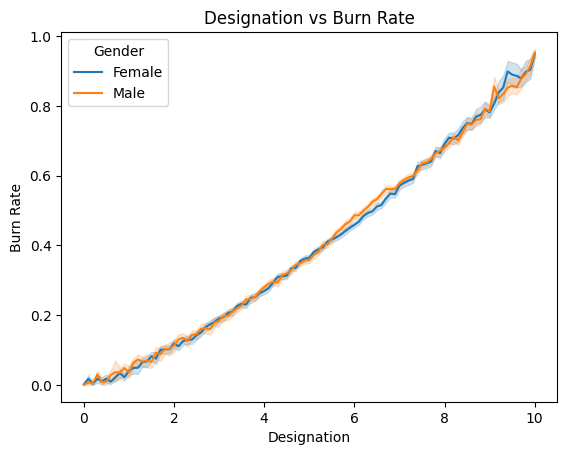

In [23]:
import seaborn as sns
sns.lineplot(x=df['Mental Fatigue Score'],y=df['Burn Rate'],hue=df['Gender'])
plt.xlabel('Designation')
plt.ylabel('Burn Rate')
plt.title('Designation vs Burn Rate')
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['WFH Setup Available']=le.fit_transform(df['WFH Setup Available'])
# df['Designation']=le.fit_transform(df['Designation
df['Company Type']=le.fit_transform(df['Company Type'])


In [31]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,0,1,0,2,3.0,3.8,0.16
1,2008-11-30,1,1,1,1,2.0,5.0,0.36
3,2008-11-03,1,1,1,1,1.0,2.6,0.20
4,2008-07-24,0,1,0,3,7.0,6.9,0.52
5,2008-11-26,1,0,1,2,4.0,3.6,0.29


In [32]:
df.corr()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Date of Joining,1.000000,0.000681,0.000212,-0.002268,0.002524,0.002059,0.000047,0.000294
Gender,0.000681,1.000000,-0.009106,-0.073637,0.110259,0.140880,0.145542,0.156362
Company Type,0.000212,-0.009106,1.000000,-0.000781,0.009211,0.005972,0.004817,0.006039
WFH Setup Available,-0.002268,-0.073637,-0.000781,1.000000,-0.231692,-0.285230,-0.277505,-0.307041
Designation,0.002524,0.110259,0.009211,-0.231692,1.000000,0.877846,0.691716,0.736320
Resource Allocation,0.002059,0.140880,0.005972,-0.285230,0.877846,1.000000,0.799527,0.854967
Mental Fatigue Score,0.000047,0.145542,0.004817,-0.277505,0.691716,0.799527,1.000000,0.944376
Burn Rate,0.000294,0.156362,0.006039,-0.307041,0.736320,0.854967,0.944376,1.000000


<Axes: >

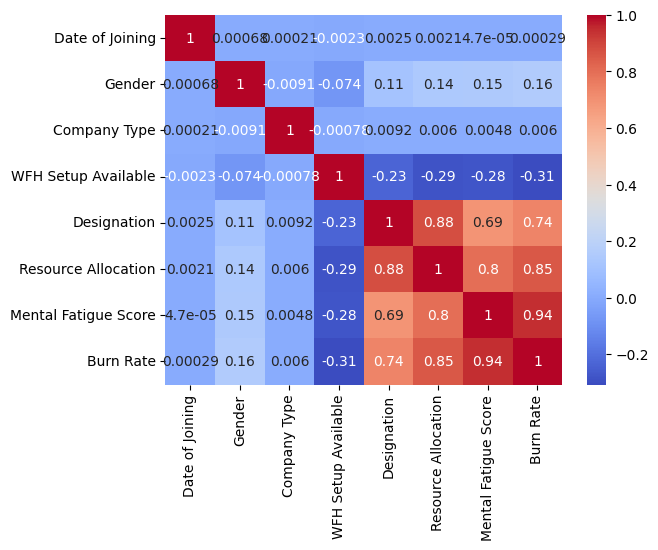

In [33]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [37]:
del df['Date of Joining']

In [38]:
x=df.drop(['Burn Rate'],axis=1)
y=df['Burn Rate']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train),index=x_train.index,columns=x_train.columns)
x_test=pd.DataFrame(sc.fit_transform(x_test),index=x_test.index,columns=x_test.columns)

In [47]:
x_train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
5539,1.051857,-1.375650,-1.081395,-1.921897,-1.212402,-1.527320
12368,-0.950699,0.726929,-1.081395,-0.160099,-0.236375,0.136564
9965,-0.950699,-1.375650,-1.081395,-0.160099,-0.724389,0.136564
613,-0.950699,-1.375650,-1.081395,0.720800,0.739652,-0.435396
3475,1.051857,-1.375650,-1.081395,-1.921897,-1.700416,-2.671240
...,...,...,...,...,...,...
13866,1.051857,0.726929,-1.081395,0.720800,1.227666,0.968506
14687,-0.950699,0.726929,0.924732,-0.160099,-0.236375,-0.071421
6570,1.051857,-1.375650,-1.081395,-1.040998,-1.212402,-0.435396
1058,-0.950699,-1.375650,0.924732,-1.040998,-0.724389,-0.331403


In [41]:
y_train.head()


5539     0.12
12368    0.44
9965     0.48
613      0.32
3475     0.05
Name: Burn Rate, dtype: float64

SVM REGRESSION MODEL

In [48]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)

SVR()

In [49]:
y_pred=svr.predict(x_test)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9086661882644711

DECISIONTREE REGRESSOR

**DECISIONTREE REGRESSION MODEL**

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred_dt))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_dt))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_dt))

r2_score: 0.8995419915278549
mean_squared_error: 0.003840470639448132
mean_absolute_error: 0.048191073604398164
